## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

e:\Anaconda\envs\py39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [3]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

## 2. GET data

In [4]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2021-07-01'
TRADE_START_DATE = '2021-07-01'
TRADE_END_DATE = '2022-10-01'

In [5]:
df = YahooDownloader(start_date = TRADE_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.NAS_100_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
finished AMGN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AAPL


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AMAT


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INTC


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PCAR


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PAYX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MSFT


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADBE


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CSCO


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SGEN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished QCOM


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished COST


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SBUX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FISV


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CTXS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INTU


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AMZN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished EBAY


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BIIB


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CHKP


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished GILD


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NLOK


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CMCSA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FAST


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADSK


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CTSH


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NVDA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished GOOGL


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ISRG


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VRTX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished HSIC


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BIDU


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ATVI


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADP


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ROST


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ORLY


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FTNT


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BKNG


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KDP


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MU


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished DLTR


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LCID


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SIRI


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MNST


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AVGO


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TXN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MDLZ


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished META


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADI


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WDC


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished REGN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LBTYK


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VRSK


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NFLX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TSLA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CHTR


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MAR


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ILMN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LRCX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished EA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AAL


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WBA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KHC


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BMRN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished JD


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SWKS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INCY


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PYPL


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CDW


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FOXA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PDD


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TMUS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished EXPE


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TCOM


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ULTA


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CSX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NTES


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MCHP


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CTAS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KLAC


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished HAS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed

e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)



finished JBHT
[*********************100%***********************]  1 of 1 completed
finished IDXX


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WYNN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MELI


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ALGN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CDNS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WDAY


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SNPS


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ASML


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TTWO


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PEP


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NXPI


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished XEL


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AMD


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NTAP


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VRSN


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LULU


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SPLK


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished UAL


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Shape of DataFrame:  (328202, 8)


In [6]:
print(config_tickers.NAS_100_TICKER)

['AMGN', 'AAPL', 'AMAT', 'INTC', 'PCAR', 'PAYX', 'MSFT', 'ADBE', 'CSCO', 'SGEN', 'QCOM', 'COST', 'SBUX', 'FISV', 'CTXS', 'INTU', 'AMZN', 'EBAY', 'BIIB', 'CHKP', 'GILD', 'NLOK', 'CMCSA', 'FAST', 'ADSK', 'CTSH', 'NVDA', 'GOOGL', 'ISRG', 'VRTX', 'HSIC', 'BIDU', 'ATVI', 'ADP', 'ROST', 'ORLY', 'FTNT', 'BKNG', 'KDP', 'MU', 'DLTR', 'LCID', 'SIRI', 'MNST', 'AVGO', 'TXN', 'MDLZ', 'META', 'ADI', 'WDC', 'REGN', 'LBTYK', 'VRSK', 'NFLX', 'TSLA', 'CHTR', 'MAR', 'ILMN', 'LRCX', 'EA', 'AAL', 'WBA', 'KHC', 'BMRN', 'JD', 'SWKS', 'INCY', 'PYPL', 'CDW', 'FOXA', 'PDD', 'TMUS', 'EXPE', 'TCOM', 'ULTA', 'CSX', 'NTES', 'MCHP', 'CTAS', 'KLAC', 'HAS', 'JBHT', 'IDXX', 'WYNN', 'MELI', 'ALGN', 'CDNS', 'WDAY', 'SNPS', 'ASML', 'TTWO', 'PEP', 'NXPI', 'XEL', 'AMD', 'NTAP', 'VRSN', 'LULU', 'SPLK', 'UAL']


In [7]:
df.shape

(328202, 8)

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,7.730000,8.480000,7.670000,7.909601,5167000,AAL,4
1,2009-01-02,3.067143,3.251429,3.041429,2.767329,746015200,AAPL,4
2,2009-01-02,21.110001,23.100000,21.070000,23.020000,6670700,ADBE,4
3,2009-01-02,19.000000,19.780001,18.760000,13.920568,3264900,ADI,4
4,2009-01-02,34.784901,35.548725,34.205444,25.174145,4021809,ADP,4


In [9]:
print(len(df.tic.unique()))

100


## 3. Preprocess Data

In [10]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

e:\RL\FinRL\finrl\meta\preprocessor\preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
e:\RL\FinRL\finrl\meta\preprocessor\preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
e:\RL\FinRL\finrl\meta\preprocessor\preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
e:\RL\FinRL\finrl\meta\preprocessor\preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
e:\RL\FinRL\finrl\meta\preprocessor\preprocessors.py:158: FutureWarning: The frame.a

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
finished ^VIX
Shape of DataFrame:  (3460, 8)


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Successfully added vix
Successfully added turbulence index


In [11]:
print(len(processed["tic"].unique()))

84


In [12]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [13]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAL,7.730000,8.480000,7.670000,7.909601,5167000.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,7.909601,7.909601,39.189999,0.0
1,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.767329,746015200.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,2.767329,2.767329,39.189999,0.0
2,2009-01-02,ADBE,21.110001,23.100000,21.070000,23.020000,6670700.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,23.020000,23.020000,39.189999,0.0
3,2009-01-02,ADI,19.000000,19.780001,18.760000,13.920568,3264900.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,13.920568,13.920568,39.189999,0.0
4,2009-01-02,ADP,34.784901,35.548725,34.205444,25.174145,4021809.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,25.174145,25.174145,39.189999,0.0
5,2009-01-02,ADSK,19.549999,20.760000,19.549999,20.680000,2845600.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,20.680000,20.680000,39.189999,0.0
6,2009-01-02,ALGN,8.520000,9.060000,8.520000,8.890000,538900.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,8.890000,8.890000,39.189999,0.0
7,2009-01-02,AMAT,10.120000,10.720000,10.010000,8.303123,10074600.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,8.303123,8.303123,39.189999,0.0
8,2009-01-02,AMD,2.190000,2.430000,2.170000,2.380000,13832100.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,2.380000,2.380000,39.189999,0.0
9,2009-01-02,AMGN,58.590000,59.080002,57.750000,44.523750,6547900.0,4.0,0.0,7.961313,7.801326,0.0,66.666667,100.0,44.523750,44.523750,39.189999,0.0


## 4. Build A Market Environment in OpenAI Gym-style

In [14]:

trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)

print(len(trade))

26460


In [15]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2021-07-01,AAL,21.469999,21.790001,21.330000,21.510000,22082700.0,3.0,-0.475474,24.679919,20.646081,46.320712,-105.614596,24.238856,23.087333,22.511500,15.48,110.052281
0,2021-07-01,AAPL,136.600006,137.330002,135.759995,136.300873,52485800.0,3.0,2.416317,137.751862,122.743960,60.297369,148.787141,39.492821,128.414943,128.956102,15.48,110.052281
0,2021-07-01,ADBE,583.330017,587.780029,581.349976,584.729980,1646100.0,3.0,21.781073,612.520055,498.027946,67.124523,101.404684,47.568144,536.093000,518.328335,15.48,110.052281
0,2021-07-01,ADI,172.029999,172.089996,168.889999,165.430389,2865100.0,3.0,2.541969,168.327181,157.919893,57.231405,130.002312,23.845958,161.672799,156.357354,15.48,110.052281
0,2021-07-01,ADP,198.619995,199.979996,198.410004,195.263870,1130300.0,3.0,0.910916,196.294402,189.517761,57.396907,130.614568,2.544616,192.198002,189.662939,15.48,110.052281


In [16]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [17]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 84, State Space: 841


In [18]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}



## 5. Trading 

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [19]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [20]:
insample_risk_indicator.vix.describe()

count    3145.000000
mean       19.173116
std         8.330195
min         9.140000
25%        13.500000
50%        16.660000
75%        22.219999
max        82.690002
Name: vix, dtype: float64

In [21]:
insample_risk_indicator.vix.quantile(0.996)

57.06848156738281

In [22]:
insample_risk_indicator.turbulence.describe()

count    3145.000000
mean      137.973764
std       149.195206
min         0.000000
25%        71.064753
50%       103.640909
75%       158.398470
max      2360.716153
Name: turbulence, dtype: float64

In [23]:
insample_risk_indicator.turbulence.quantile(0.996)

998.7252660346443

### testing 

In [24]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)

In [25]:
trained_sac_path = "E:/RL/FinRL/trained_models/trained_sac/"
df_account_value, df_actions = DRLAgent.DRL_prediction_load_from_file(
    model_name="sac", 
    environment = e_trade_gym,
    cwd=trained_sac_path)

Successfully load model E:/RL/FinRL/trained_models/trained_sac/
hit end!


In [26]:
df_account_value.shape

(315, 2)

In [27]:
df_account_value.tail()

,date,account_value
310,2022-09-23,746657.901726
311,2022-09-26,745015.920847
312,2022-09-27,746284.665636
313,2022-09-28,775885.098116
314,2022-09-29,759969.921835


In [28]:
df_actions.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,AMAT,AMD,AMGN,...,TTWO,TXN,UAL,ULTA,VRSN,VRTX,WBA,WDC,WYNN,XEL
date,,,,,,,,,,,,,,,,,,,,,
2021-07-01,0,0,0,0,0,96,67,0,0,20,...,66,0,0,0,0,73,0,0,0,84
2021-07-02,0,0,0,0,0,96,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Backtesting Results

### BackTestStats

In [29]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return         -0.197145
Cumulative returns    -0.240030
Annual volatility      0.261043
Sharpe ratio          -0.712944
Calmar ratio          -0.583849
Stability              0.741026
Max drawdown          -0.337664
Omega ratio            0.887048
Sortino ratio         -0.958184
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.954992
Daily value at risk   -0.033627
dtype: float64


e:\Anaconda\envs\py39\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [30]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^NDX", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
finished ^NDX
Shape of DataFrame:  (314, 8)
Annual return         -0.172858
Cumulative returns    -0.210591
Annual volatility      0.271077
Sharpe ratio          -0.566344
Calmar ratio          -0.526067
Stability              0.642884
Max drawdown          -0.328586
Omega ratio            0.910415
Sortino ratio         -0.752250
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.920653
Daily value at risk   -0.034762
dtype: float64


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [31]:
df_account_value.loc[0,'date']

'2021-07-01'

In [32]:
df_account_value.loc[len(df_account_value)-1,'date']

'2022-09-29'

### BackTestPlot

==============Compare to NDX===========
[*********************100%***********************]  1 of 1 completed
finished ^NDX
Shape of DataFrame:  (314, 8)


e:\RL\FinRL\finrl\meta\preprocessor\yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2021-07-01
End date,2022-09-29
Total months,15
,Backtest
Annual return,-19.7%
Cumulative returns,-24.0%
Annual volatility,26.1%
Sharpe ratio,-0.71
Calmar ratio,-0.58
Stability,0.74
Max drawdown,-33.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.04,2021-11-09,2022-06-15,NaT,NaN
1,4.15,2021-09-24,2021-10-01,2021-11-04,30
3,2.52,2021-09-03,2021-09-20,2021-09-23,15
2,1.61,2021-07-13,2021-07-16,2021-07-22,8
4,1.47,2021-08-05,2021-08-17,2021-08-24,14


e:\Anaconda\envs\py39\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
e:\Anaconda\envs\py39\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this w

Stress Events,mean,min,max
New Normal,-0.07%,-5.53%,4.33%


e:\Anaconda\envs\py39\lib\site-packages\pyfolio\timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


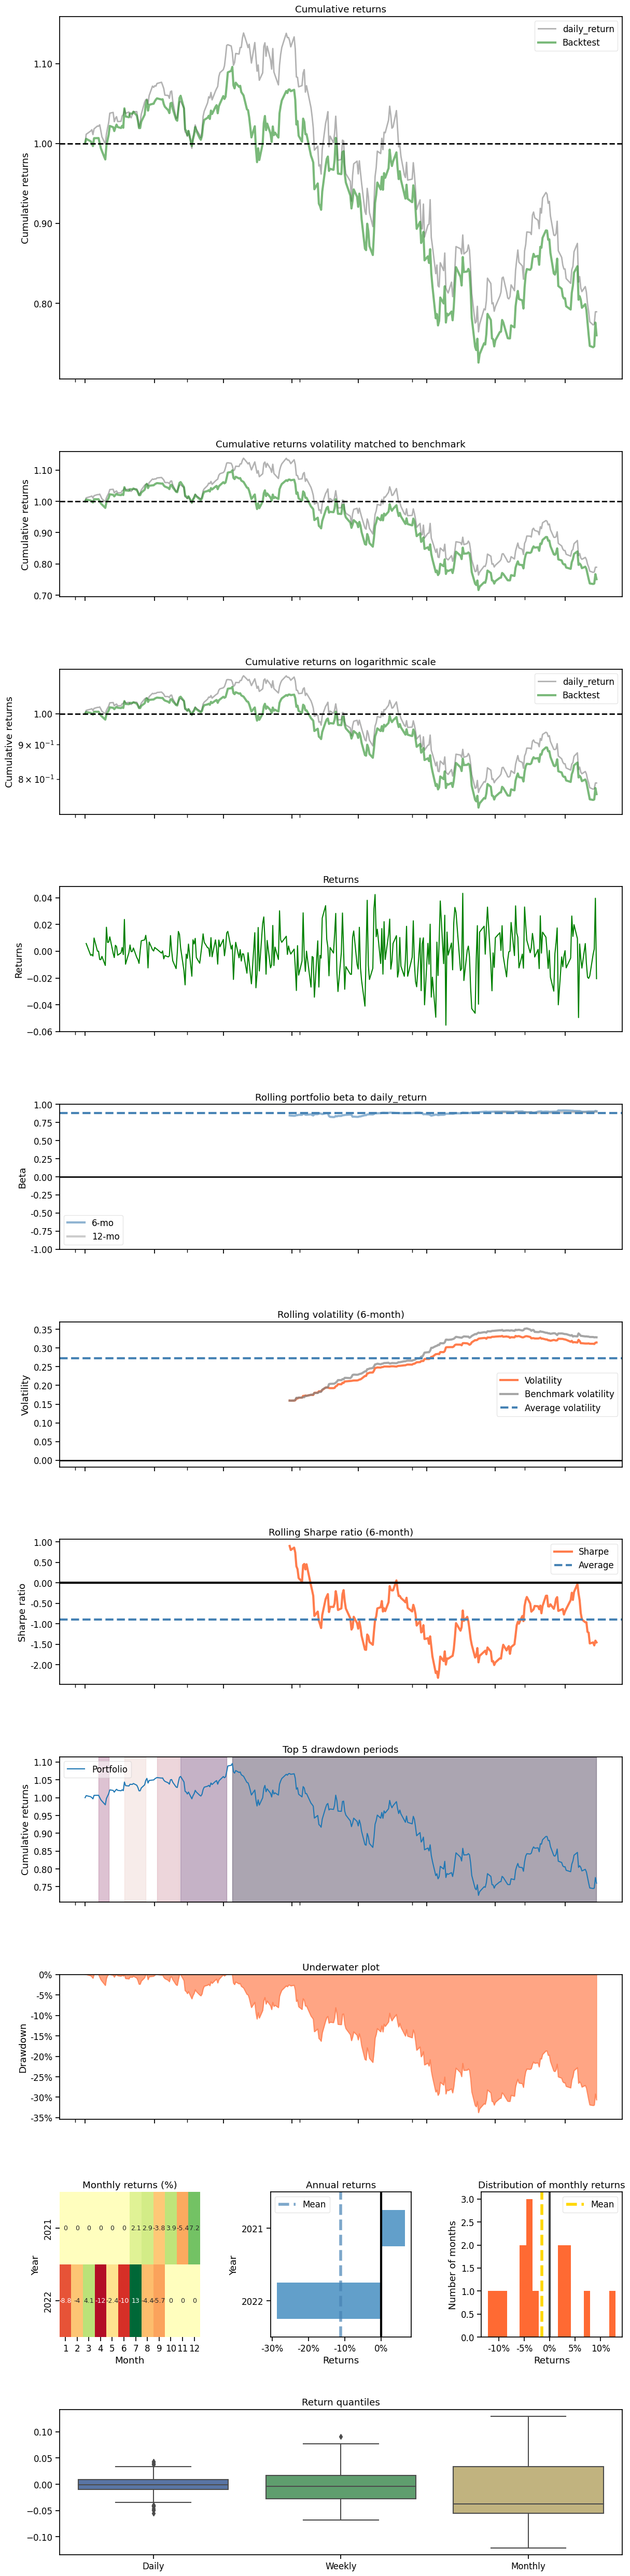

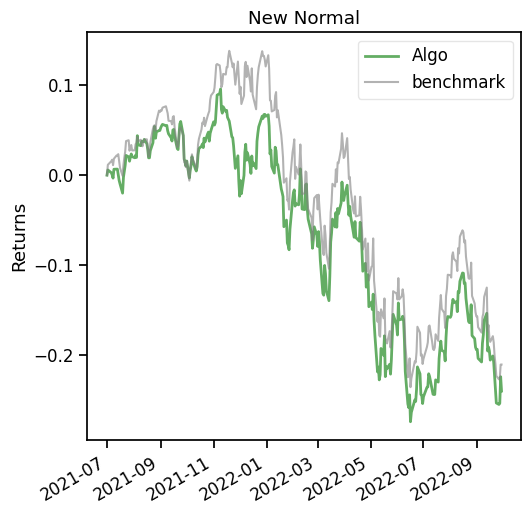

In [33]:
print("==============Compare to NDX===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^NDX', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])